In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
# bordaforanalysis=pd.read_csv("D:\\python projects\\seminar\\bordapostsdataforanalysis.csv", encoding='iso-8859-8')
bordaforanalysis=pd.read_csv("D:\\python projects\\seminar\\low_glmnet_post.csv", encoding='iso-8859-8')

In [3]:
bordaforanalysis.columns

Index(['post_num', 'L_partlistscore', 'L_maxs_eq_min', 'L_bordaartscr',
       'Termostat_L_B', 'Fan_L_B', 'Water_pump_L_B', 'Radiator_L_B',
       'M_partlistscore', 'M_maxs_eq_min', 'M_bordaartscr', 'pred_Termostat_B',
       'pred_Fan_B', 'pred_Water_pump_B', 'pred_Radiator_B'],
      dtype='object')

In [4]:
bordaforanalysis['stam']=1
bordaforanalysis_agg = bordaforanalysis.groupby('stam').agg({
        'Termostat_L_B':'sum',
        'Fan_L_B':'sum',
        'Water_pump_L_B':'sum',
        'Radiator_L_B':'sum',
        'pred_Termostat_B':'sum',
        'pred_Fan_B':'sum',
        'pred_Water_pump_B':'sum',
        'pred_Radiator_B':'sum'
})

In [5]:
# bordaforanalysis_agg

In [6]:
bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].groupby('stam').agg({
        'Termostat_L_B':'sum',
        'Fan_L_B':'sum',
        'Water_pump_L_B':'sum',
        'Radiator_L_B':'sum'})

,Termostat_L_B,Fan_L_B,Water_pump_L_B,Radiator_L_B
stam,,,,
1,296,333,192,379


In [7]:
bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].groupby('stam').agg({
        'pred_Termostat_B':'sum',
        'pred_Fan_B':'sum',
        'pred_Water_pump_B':'sum',
        'pred_Radiator_B':'sum'})

,pred_Termostat_B,pred_Fan_B,pred_Water_pump_B,pred_Radiator_B
stam,,,,
1,288,344,188,368


In [8]:
def checkuniquelist(lst):
    if len(list(set(lst)))==len(lst):
        uniq=1
    else:
        uniq=0
    return uniq

In [9]:
checkuniquelist([2, 6, 1, 3])

1

In [10]:
bordaforanalysis['L_diff_score_ind']=bordaforanalysis['L_partlistscore'].map(lambda x: checkuniquelist(x.replace('[','').replace(']','').replace(' ','').split(',')))
bordaforanalysis['M_diff_score_ind']=bordaforanalysis['M_partlistscore'].map(lambda x: checkuniquelist(x.replace('[','').replace(']','').replace(' ','').split(',')))

In [11]:
bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1]

bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].groupby('stam').agg({
        'Termostat_L_B':'sum',
        'Fan_L_B':'sum',
        'Water_pump_L_B':'sum',
        'Radiator_L_B':'sum'})

,Termostat_L_B,Fan_L_B,Water_pump_L_B,Radiator_L_B
stam,,,,
1,69,76,37,100


In [12]:
bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1]

bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].groupby('stam').agg({
        'pred_Termostat_B':'sum',
        'pred_Fan_B':'sum',
        'pred_Water_pump_B':'sum',
        'pred_Radiator_B':'sum'})

,pred_Termostat_B,pred_Fan_B,pred_Water_pump_B,pred_Radiator_B
stam,,,,
1,67,86,37,98


In [13]:

bordaforanalysis[bordaforanalysis['M_diff_score_ind']==0].groupby('stam').agg({
        'pred_Termostat_B':'sum',
        'pred_Fan_B':'sum',
        'pred_Water_pump_B':'sum',
        'pred_Radiator_B':'sum'})

,pred_Termostat_B,pred_Fan_B,pred_Water_pump_B,pred_Radiator_B
stam,,,,
1,259,291,178,298


In [14]:
bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1]

,post_num,L_partlistscore,L_maxs_eq_min,L_bordaartscr,Termostat_L_B,Fan_L_B,Water_pump_L_B,Radiator_L_B,M_partlistscore,M_maxs_eq_min,M_bordaartscr,pred_Termostat_B,pred_Fan_B,pred_Water_pump_B,pred_Radiator_B,stam,L_diff_score_ind,M_diff_score_ind
6,41876,"[1, 2, 0, 3]",0,"[1, 2, 0, 3]",1,2,0,3,"[1, 2, 0, 3]",0,"[1, 2, 0, 3]",1,2,0,3,1,1,1
7,45775,"[3, 1, 1, 1]",0,"[3, 1, 2, 0]",3,1,2,0,"[3, 2, 0, 1]",0,"[3, 2, 0, 1]",3,2,0,1,1,0,1
17,106908,"[2, 6, 1, 3]",0,"[1, 3, 0, 2]",1,3,0,2,"[2, 6, 1, 4]",0,"[1, 3, 0, 2]",1,3,0,2,1,1,1
18,107309,"[4, 6, 0, 2]",0,"[2, 3, 0, 1]",2,3,0,1,"[4, 6, 0, 2]",0,"[2, 3, 0, 1]",2,3,0,1,1,1,1
22,127779,"[2, 1, 5, 6]",0,"[1, 0, 2, 3]",1,0,2,3,"[3, 1, 4, 6]",0,"[1, 0, 2, 3]",1,0,2,3,1,1,1
28,152784,"[10, 8, 0, 9]",0,"[3, 1, 0, 2]",3,1,0,2,"[10, 11, 0, 8]",0,"[2, 3, 0, 1]",2,3,0,1,1,1,1
29,153087,"[1, 2, 0, 12]",0,"[1, 2, 0, 3]",1,2,0,3,"[1, 3, 0, 12]",0,"[1, 2, 0, 3]",1,2,0,3,1,1,1
30,154574,"[9, 3, 1, 7]",0,"[3, 1, 0, 2]",3,1,0,2,"[9, 3, 1, 7]",0,"[3, 1, 0, 2]",3,1,0,2,1,1,1
34,169750,"[8, 2, 0, 5]",0,"[3, 1, 0, 2]",3,1,0,2,"[8, 2, 0, 5]",0,"[3, 1, 0, 2]",3,1,0,2,1,1,1
37,171061,"[1, 7, 2, 5]",0,"[0, 3, 1, 2]",0,3,1,2,"[1, 7, 2, 5]",0,"[0, 3, 1, 2]",0,3,1,2,1,1,1


In [15]:
def ordenadorborda(lstraw):
    lst=lstraw
    hola=[]
    lenlst=len(lst)
    for i in range(lenlst):
    #     print(i)
        lenlst=len(lst)
        try:
            hola.append([max(lst),lenlst-1])
            lst = [i for i in lst if i !=max(lst)]
#             print(lst)
        except:
            pass
    chau=[]
    for i in lstraw:
        for j in hola:
    #         print(i ,j[1])
            if i==j[0]:
                chau.append([j[1],i])
    x = np.reshape(chau, (len(chau),2 )).T
#     print(x[0])

    positions=[]
    for i in x[0]:
        multi=len([j for j in x[0] if j==i])
        if multi>1:
            newpos=random.randint(i-multi+1, i)
            while  positions.count(newpos)>0:
                newpos=random.randint(i-multi+1, i)
            positions.append(newpos)
        else:
            positions.append(i)
    return positions

In [16]:
ordenadorborda([3,3,23,1111])

[1, 0, 2, 3]

In [17]:
bordaforanalysis.iloc[:, 7].describe()

count    219.000000
mean       1.803653
std        1.032848
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Radiator_L_B, dtype: float64

In [18]:
from numpy.random import seed, randn
import matplotlib.pyplot as plt
# Configuro la semilla aleatoria
seed(1993)
# Genero 100 muestras


In [19]:

# import seaborn as sns
# import matplotlib.pyplot as plt

# for i in range(2,12):
#     df = bordaforanalysis.iloc[:, i]
#     df.head()

#     sns.boxplot( data=bordaforanalysis[bordaforanalysis.columns[i]] , orient="h", palette="Blues").set_title(bordaforanalysis.columns[i][::-1]);

#     plt.show()
    
# #     title(bordaforanalysis.columns[i[::-1])

#     print(bordaforanalysis.iloc[:, i].describe())

#     print('\n')    
#     print('\n')



In [20]:
bordaforanalysis.columns

Index(['post_num', 'L_partlistscore', 'L_maxs_eq_min', 'L_bordaartscr',
       'Termostat_L_B', 'Fan_L_B', 'Water_pump_L_B', 'Radiator_L_B',
       'M_partlistscore', 'M_maxs_eq_min', 'M_bordaartscr', 'pred_Termostat_B',
       'pred_Fan_B', 'pred_Water_pump_B', 'pred_Radiator_B', 'stam',
       'L_diff_score_ind', 'M_diff_score_ind'],
      dtype='object')

Avri Saar
קודם כל בודקים לחץ הפוך, על מנת לשלול נזק גדול יותר (ראש מנוע, מנוע לפעמים) תלוי עד איזה 

רמת רתיחה הגעת. אחרי שבודקים לחץ הפוך ויצא תקין ממשיכים בבדיקות , רדיאטור, פלאש מים,תרמוסטט., ציונורות בכללי, מאוורר מנוע. וכו


רדיאטור >טרמוסטט>מאוורר

In [21]:
Avri_Saar=list(ordenadorborda([3,2,1,4])) # mecanico
Avri_Saar.append('mech')
Avri_Saar

[2, 1, 0, 3, 'mech']

In [22]:
omri_brem=ordenadorborda([4,3,2,1]) # mecanico 
omri_brem.append('mech')
omri_brem

[3, 2, 1, 0, 'mech']

In [23]:
moshe_musachnik=ordenadorborda([2,4,1,3,]) # mecanico
moshe_musachnik.append('mech')

In [24]:
ariel_fernandez=ordenadorborda([3,2,1,4]) # ingeniero
ariel_fernandez.append('ing')

In [25]:
alex_bordoyov=ordenadorborda([2,4,1,3]) # mecanico
alex_bordoyov.append('mech')

In [26]:
ronen_mordo=ordenadorborda([4,3,1,2])  # mecanico
ronen_mordo.append('mech')

In [27]:
yuri_shneider=ordenadorborda([2,1,3,4]) # ingeniero
yuri_shneider.append('ing')

In [28]:
yuda_padovitz=ordenadorborda([4,2,1,3]) # mecanico
yuda_padovitz.append('mech')

In [29]:
martin_benitez=ordenadorborda([3,4,1,2]) # mecanico
martin_benitez.append('mech')

In [30]:
aviel_katriel=ordenadorborda([2,3,1,4])# ingeniero
aviel_katriel.append('ing')

In [31]:
Shahar_David_Hershkovici=ordenadorborda([2,3,1,4]) # ingeniero
Shahar_David_Hershkovici.append('ing')

In [32]:
sharon_maarabi=ordenadorborda([3,4,1,2]) #ingeniero
sharon_maarabi.append('ing')

In [33]:
todasopciones=[0,1,2,3]

In [34]:
[0,1,2,3],[3,0,1,2],[2,3,0,1],[1,2,3,0]

([0, 1, 2, 3], [3, 0, 1, 2], [2, 3, 0, 1], [1, 2, 3, 0])

In [35]:
experts= list(zip(Avri_Saar,moshe_musachnik,ariel_fernandez,\
                  alex_bordoyov,yuri_shneider,ronen_mordo,yuda_padovitz,martin_benitez,aviel_katriel,sharon_maarabi,\
                  Shahar_David_Hershkovici,omri_brem))
experts_df=pd.DataFrame(experts).T
experts_df
experts_df.rename(columns={0:'Termostate',1:'Fan',2:'Bomb',3:'Radiator',4:'Expert'}, inplace=True)
experts_df['stam']=1
experts_df=experts_df.sort_values(by='Expert').reset_index(drop=True)
experts_df.to_csv('all.csv')

In [36]:
mecanicos_T=experts_df[experts_df['Expert']=='mech']
mecanicos_T_total = mecanicos_T.groupby('stam').agg({
        'Termostate':'sum',
        'Fan':'sum',
        'Bomb':'sum',
        'Radiator':'sum'})
mecanicos_T_total

,Termostate,Fan,Bomb,Radiator
stam,,,,
1,15,15,1,11


In [37]:
ingenieros_T=experts_df[experts_df['Expert']=='ing']
ingenieros_T_total = ingenieros_T.groupby('stam').agg({
        'Termostate':'sum',
        'Fan':'sum',
        'Bomb':'sum',
        'Radiator':'sum'})
ingenieros_T_total

,Termostate,Fan,Bomb,Radiator
stam,,,,
1,7,8,2,13


In [38]:
expets=pd.DataFrame(experts)

In [39]:
expert_T=expets.T
expert_T.rename(columns={0:'Termostate',1:'Fan',2:'Bomb',3:'Radiator',4:'Expert'}, inplace=True)
expert_T=expert_T.sort_values(by='Expert')
expert_T.reset_index(drop=True, inplace=True)
expert_T

,Termostate,Fan,Bomb,Radiator,Expert
0,2,1,0,3,ing
1,1,0,2,3,ing
2,1,2,0,3,ing
3,2,3,0,1,ing
4,1,2,0,3,ing
5,2,1,0,3,mech
6,1,3,0,2,mech
7,1,3,0,2,mech
8,3,2,0,1,mech
9,3,1,0,2,mech


In [40]:
experts_df
expert_T_total = experts_df.groupby('stam').agg({
        'Termostate':'sum',
        'Fan':'sum',
        'Bomb':'sum',
        'Radiator':'sum'})

In [41]:
expert_T_total

,Termostate,Fan,Bomb,Radiator
stam,,,,
1,22,23,3,24


In [42]:
# for i in range(0,4):
#     df = expert_T.iloc[:, i]
#     df.head()

#     sns.boxplot( data=expert_T[expert_T.columns[i]] , orient="h", palette="Blues").set_title(expert_T.columns[i]);

#     plt.show()
    

# #     title(bordaforanalysis.columns[i[::-1])

#     print(expert_T.iloc[:, i].describe())

#     print('\n')    
#     print('\n')


In [43]:
expert_T_total.iloc[:, :]

,Termostate,Fan,Bomb,Radiator
stam,,,,
1,22,23,3,24


In [44]:
# import math
# from scipy.stats import entropy
# def ajidus(df_col):
#     colname=''
#     try:
#         colname=pd.DataFrame(df_col).columns[0]
#     except:
#         pass
#     lst=list(df_col)
#     n=len(lst)
#     result = [] 
    
#     [result.append(x) for x in lst if x not in result] 
#     nvar=len(result)
#     vals=[]
#     lstfrentr=[]
#     for e in result:
#         vals.append([e,lst.count(e)])
#         lstfrentr.append(lst.count(e)/n)
#         len(vals)
# #     lst.count(2)
#     qk=[1/len(vals)]*len(vals)
#     return colname, entropy(lstfrentr,qk, base=2),vals  

In [45]:
# for i in range(7,11):
#     print(ajidus(bordaforanalysis.iloc[:, i]))

In [46]:
# for i in range(4):
#     print(ajidus(expert_T.iloc[:, i]))

In [47]:
def catvariance(df_col):
    colname=''
    try:
        colname=pd.DataFrame(df_col).columns[0]
    except:
        pass
    lst=list(df_col)
    n=len(lst)
    result = [] 
    
    [result.append(x) for x in lst if x not in result] 
    nvar=len(result)
    vals=[]
    lstfrentr=[]
    for e in result:
        vals.append([e,lst.count(e)])
        lstfrentr.append(lst.count(e)/n)
    hola=[]
    for i in lstfrentr:
        hola.append(i**2)
    return colname, 1-sum(hola)

In [48]:
for i in range(4):
    print(catvariance(expert_T.iloc[:, i]))

('Termostate', 0.6527777777777778)
('Fan', 0.7083333333333334)
('Bomb', 0.29166666666666663)
('Radiator', 0.6944444444444444)


In [49]:
expert_T.iloc[:, i]

0     3
1     3
2     3
3     1
4     3
5     3
6     2
7     2
8     1
9     2
10    1
11    0
Name: Radiator, dtype: object

In [50]:
for i in range(4):
    print(catvariance(mecanicos_T.iloc[:, i]))

('Termostate', 0.653061224489796)
('Fan', 0.653061224489796)
('Bomb', 0.24489795918367352)
('Radiator', 0.6938775510204082)


In [51]:
for i in range(4):
    print(catvariance(ingenieros_T.iloc[:, i]))

('Termostate', 0.48)
('Fan', 0.72)
('Bomb', 0.31999999999999984)
('Radiator', 0.31999999999999984)


In [52]:
for i in range(4,8):
    print(catvariance(bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:, i]))

('Termostat_L_B', 0.7459)
('Fan_L_B', 0.74395)
('Water_pump_L_B', 0.69065)
('Radiator_L_B', 0.70575)


In [53]:
for i in range(4,8):
    print(catvariance(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:, i]))

('Termostat_L_B', 0.7324581258488003)
('Fan_L_B', 0.7270258035310095)
('Water_pump_L_B', 0.6292440018107742)
('Radiator_L_B', 0.6147578089633319)


In [54]:
for i in range(11,15):
    print(catvariance(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:, i]))

('pred_Termostat_B', 0.7468625650443832)
('pred_Fan_B', 0.7385470870319355)
('pred_Water_pump_B', 0.6853892459953066)
('pred_Radiator_B', 0.7150290786654423)


In [55]:
for i in range(11,15):
    print(catvariance(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:, i]))

('pred_Termostat_B', 0.7092013888888888)
('pred_Fan_B', 0.7282986111111112)
('pred_Water_pump_B', 0.5824652777777779)
('pred_Radiator_B', 0.6692708333333334)


In [56]:
bordaforanalysis.columns

Index(['post_num', 'L_partlistscore', 'L_maxs_eq_min', 'L_bordaartscr',
       'Termostat_L_B', 'Fan_L_B', 'Water_pump_L_B', 'Radiator_L_B',
       'M_partlistscore', 'M_maxs_eq_min', 'M_bordaartscr', 'pred_Termostat_B',
       'pred_Fan_B', 'pred_Water_pump_B', 'pred_Radiator_B', 'stam',
       'L_diff_score_ind', 'M_diff_score_ind'],
      dtype='object')

In [57]:
from scipy.stats import mannwhitneyu


In [58]:
res = mannwhitneyu([20, 11, 17, 12]*100, [20, 11, 17, 12]*100, method="auto")
print(res)

MannwhitneyuResult(statistic=80000.0, pvalue=1.0)


In [59]:
bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,4]
[int(item) for item in list(expert_T.iloc[:,0])]

[2, 1, 1, 2, 1, 2, 1, 1, 3, 3, 2, 3]

In [60]:
mannwhitneyu(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,4],[int(item) for item in list(expert_T.iloc[:,0])], method="auto")

MannwhitneyuResult(statistic=224.5, pvalue=0.2625237796383588)

In [80]:
L_Termostat = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,4],[int(item) for item in list(expert_T.iloc[:,0])], method="auto")
M_Termostat = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,11],[int(item) for item in list(expert_T.iloc[:,0])], method="auto")
model_compar_tert = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,11],bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,4], method="auto")

print(L_Termostat)
print(M_Termostat)
print(model_compar_tert)

MannwhitneyuResult(statistic=224.5, pvalue=0.2625237796383588)
MannwhitneyuResult(statistic=214.5, pvalue=0.15602253092802484)
MannwhitneyuResult(statistic=1077.5, pvalue=0.6972787891042732)


In [127]:
# L_Termostat = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,4],[int(item) for item in list(expert_T.iloc[:,0])], method="auto")
# M_Termostat = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,11],[int(item) for item in list(expert_T.iloc[:,0])], method="auto")
# model_compar_tert = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,11],bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,4], method="auto")

# print(L_Termostat)
# print(M_Termostat)
# print(model_compar_tert)

MannwhitneyuResult(statistic=983.0, pvalue=0.27803765374756373)
MannwhitneyuResult(statistic=956.0, pvalue=0.24169056892545648)
MannwhitneyuResult(statistic=19555.0, pvalue=0.8255884391361976)


In [124]:
L_Fan = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,5],[int(item) for item in list(expert_T.iloc[:,1])], method="auto")
M_Fan = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,12],[int(item) for item in list(expert_T.iloc[:,1])], method="auto")
model_compar_fan = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,12],bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,5], method="auto")

print(L_Fan)
print(M_Fan)
print(model_compar_fan)

MannwhitneyuResult(statistic=245.5, pvalue=0.48080646615050504)
MannwhitneyuResult(statistic=272.5, pvalue=0.7725849517357957)
MannwhitneyuResult(statistic=1207.0, pvalue=0.544359711931352)


In [129]:
# L_Fan = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,5],[int(item) for item in list(expert_T.iloc[:,1])], method="auto")
# M_Fan = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,12],[int(item) for item in list(expert_T.iloc[:,1])], method="auto")
# model_compar_fan = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,12],bordaforanalysis[bordaforanalysis['L_diff_score_ind']!=1].iloc[:,5], method="auto")

# print(L_Fan)
# print(M_Fan)
# print(model_compar_fan)

MannwhitneyuResult(statistic=1054.5, pvalue=0.46687316988926875)
MannwhitneyuResult(statistic=1091.5, pvalue=0.6259101345806763)
MannwhitneyuResult(statistic=17386.5, pvalue=0.7175182336728111)


In [125]:
L_Water_pump = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,6],[int(item) for item in list(expert_T.iloc[:,2])], method="auto")
M_Water_pump = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,13],[int(item) for item in list(expert_T.iloc[:,2])], method="auto")
model_compar_wp = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,13],bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,6], method="auto")

print(L_Water_pump)
print(M_Water_pump)
print(model_compar_wp)

MannwhitneyuResult(statistic=368.5, pvalue=0.06654350047879261)
MannwhitneyuResult(statistic=359.5, pvalue=0.12218099070824859)
MannwhitneyuResult(statistic=1083.5, pvalue=0.715136894517068)


In [130]:
# L_Water_pump = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,6],[int(item) for item in list(expert_T.iloc[:,2])], method="auto")
# M_Water_pump = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,13],[int(item) for item in list(expert_T.iloc[:,2])], method="auto")
# model_compar_wp = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,13],bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,6], method="auto")

# print(L_Water_pump)
# print(M_Water_pump)
# print(model_compar_wp)

MannwhitneyuResult(statistic=1703.5, pvalue=0.00947518604872258)
MannwhitneyuResult(statistic=1657.5, pvalue=0.014056490157577367)
MannwhitneyuResult(statistic=19531.0, pvalue=0.8039506330329308)


In [126]:
L_Radiator = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,7],[int(item) for item in list(expert_T.iloc[:,3])], method="auto")
M_Radiator = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,14],[int(item) for item in list(expert_T.iloc[:,3])], method="auto")
model_compar_radi = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,7],bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,14], method="auto")

print(L_Radiator)
print(M_Radiator)
print(model_compar_radi)

MannwhitneyuResult(statistic=292.5, pvalue=0.839138134580534)
MannwhitneyuResult(statistic=287.0, pvalue=0.9921956941526716)
MannwhitneyuResult(statistic=1189.5, pvalue=0.6253220084738009)


In [131]:
# L_Radiator = mannwhitneyu(bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,7],[int(item) for item in list(expert_T.iloc[:,3])], method="auto")
# M_Radiator = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,14],[int(item) for item in list(expert_T.iloc[:,3])], method="auto")
# model_compar_radi = mannwhitneyu(bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1].iloc[:,7],bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1].iloc[:,14], method="auto")

# print(L_Radiator)
# print(M_Radiator)
# print(model_compar_radi)

MannwhitneyuResult(statistic=1124.0, pvalue=0.7006596483486476)
MannwhitneyuResult(statistic=1085.0, pvalue=0.5999190117032233)
MannwhitneyuResult(statistic=20298.0, pvalue=0.6497570272705132)


In [65]:
bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].columns

Index(['post_num', 'L_partlistscore', 'L_maxs_eq_min', 'L_bordaartscr',
       'Termostat_L_B', 'Fan_L_B', 'Water_pump_L_B', 'Radiator_L_B',
       'M_partlistscore', 'M_maxs_eq_min', 'M_bordaartscr', 'pred_Termostat_B',
       'pred_Fan_B', 'pred_Water_pump_B', 'pred_Radiator_B', 'stam',
       'L_diff_score_ind', 'M_diff_score_ind'],
      dtype='object')

In [85]:
# sns.histplot(data=bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1], x="Termostat_L_B", bins=[-1, 0, 1, 2, 3,4], discrete=True)

In [87]:
# sns.histplot(data=bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1], x="pred_Termostat_B", bins=[-1, 0, 1, 2, 3,4], discrete=True)

In [88]:
# sns.histplot(data=expert_T, x="Termostate", bins=[-1, 0, 1, 2, 3,4], discrete=True)

In [94]:
expert_T

,Termostate,Fan,Bomb,Radiator,Expert
0,2,1,0,3,ing
1,1,0,2,3,ing
2,1,2,0,3,ing
3,2,3,0,1,ing
4,1,2,0,3,ing
5,2,1,0,3,mech
6,1,3,0,2,mech
7,1,3,0,2,mech
8,3,2,0,1,mech
9,3,1,0,2,mech


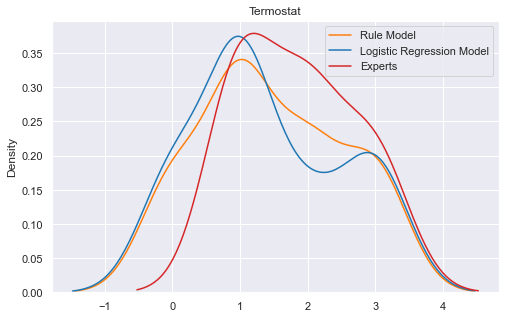

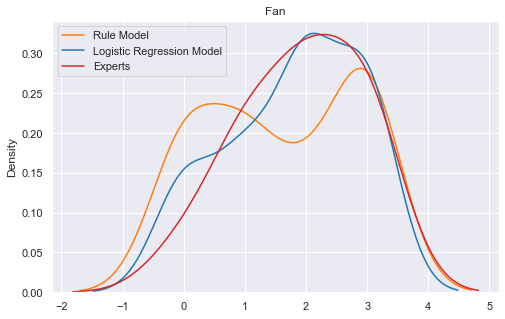

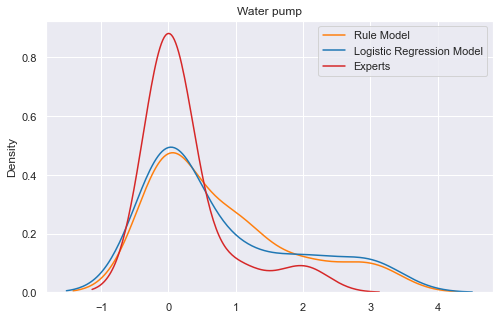

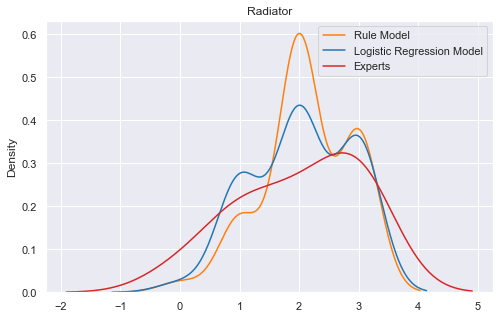

In [101]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
# sns.set(style="darkgrid")
plt.figure(figsize = (8,5))

# Sort the dataframe by target
target_0 = bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1]
target_1 = bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1]
target_2 = expert_T

sns.distplot(target_0[['Termostat_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Termostat_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Termostate']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Termostat")

plt.show()

plt.figure(figsize = (8,5))
sns.distplot(target_0[['Fan_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Fan_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Fan']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Fan")
plt.show()


plt.figure(figsize = (8,5))
sns.distplot(target_0[['Water_pump_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Water_pump_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Bomb']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Water pump")
plt.show()


plt.figure(figsize = (8,5))
sns.distplot(target_0[['Radiator_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Radiator_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Radiator']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Radiator")
plt.show()

<AxesSubplot:xlabel='Termostat_L_B', ylabel='Density'>

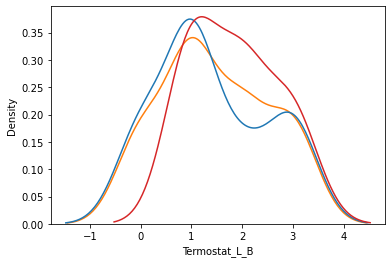

In [70]:
iris = sns.load_dataset("iris")

sns.kdeplot(data=bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,4], color="Tab:orange")
sns.kdeplot(data=bordaforanalysis[bordaforanalysis['M_diff_score_ind']==1].iloc[:,11], color="Tab:blue")
sns.kdeplot(data=expert_T['Termostate'], color="Tab:red")



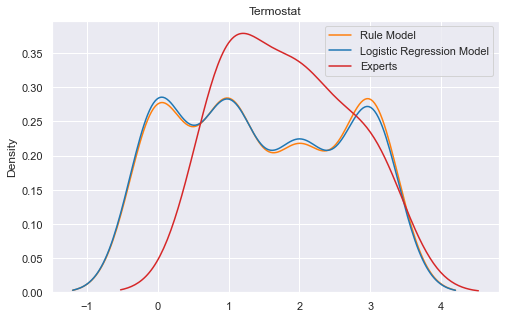

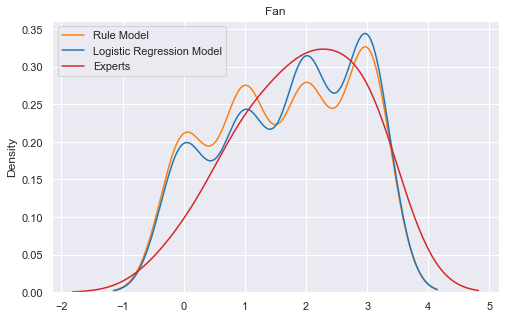

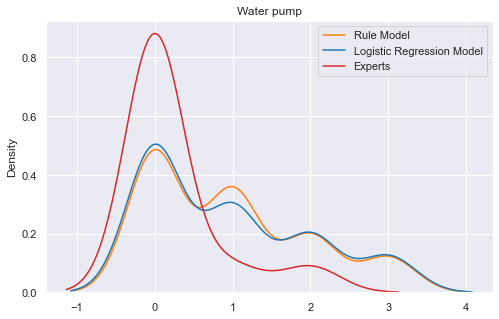

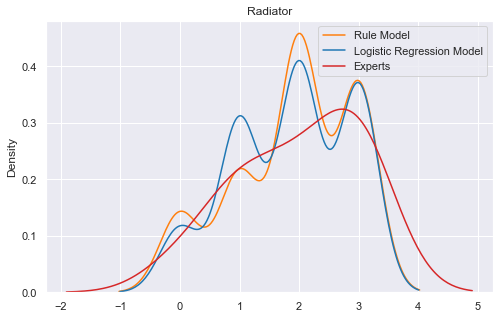

In [128]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
# sns.set(style="darkgrid")
plt.figure(figsize = (8,5))

# Sort the dataframe by target
target_0 = bordaforanalysis[bordaforanalysis['L_maxs_eq_min']!=1]
target_1 = bordaforanalysis[bordaforanalysis['M_maxs_eq_min']!=1]
target_2 = expert_T

sns.distplot(target_0[['Termostat_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Termostat_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Termostate']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Termostat")

plt.show()

plt.figure(figsize = (8,5))
sns.distplot(target_0[['Fan_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Fan_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Fan']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Fan")
plt.show()


plt.figure(figsize = (8,5))
sns.distplot(target_0[['Water_pump_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Water_pump_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Bomb']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Water pump")
plt.show()


plt.figure(figsize = (8,5))
sns.distplot(target_0[['Radiator_L_B']], hist=False, rug=False, color="Tab:orange", label='Rule Model')
sns.distplot(target_1[['pred_Radiator_B']], hist=False, rug=False, color="Tab:blue", label='Logistic Regression Model')
sns.distplot(target_2[['Radiator']], hist=False, rug=False, color="Tab:red", label='Experts')
plt.legend()

plt.title("Radiator")
plt.show()

In [72]:
expert_T

,Termostate,Fan,Bomb,Radiator,Expert
0,2,1,0,3,ing
1,1,0,2,3,ing
2,1,2,0,3,ing
3,2,3,0,1,ing
4,1,2,0,3,ing
5,2,1,0,3,mech
6,1,3,0,2,mech
7,1,3,0,2,mech
8,3,2,0,1,mech
9,3,1,0,2,mech


NameError: name 'n_bins' is not defined

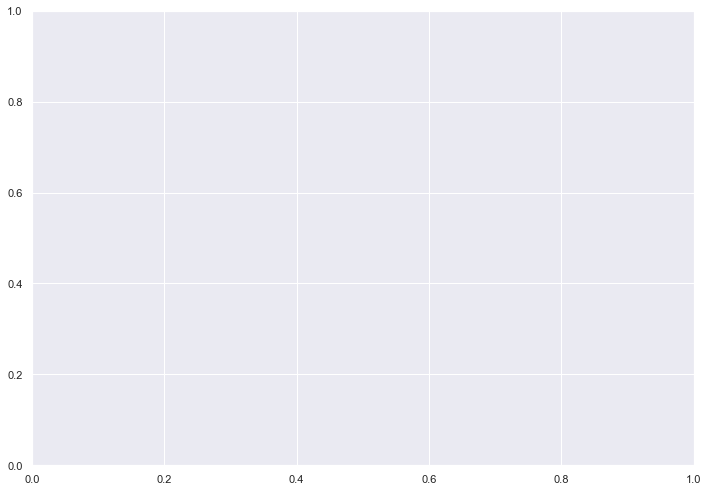

In [73]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 
# Creating dataset
np.random.seed(23685752)
N_points = 10000
# n_bins = 4
 
# Creating distribution
x = bordaforanalysis[bordaforanalysis['L_diff_score_ind']==1].iloc[:,7]
# y = .8 ** x + np.random.randn(10000) + 25
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
 
# Show plot
plt.show()

In [ ]:
expert_T.iloc[:,0]

In [ ]:
ajidus([1,2,2,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8])